## Extract average distributions and errors from individual simulations

In [2]:
# Import required packages

import json
import os
import numpy as np
import matplotlib.pyplot as plt

### Create json for systems with 105 charges

In [ ]:
# Store the average distributions, standard deviations,
# and standard errors in arrays. These are of length
# 37 because our box length is 75, and therefore our
# space-charge region has half width of 37 lattice
# spacing. There are 14 permittivities and so these 
# are stored at the respective indicies e.g. index
# (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) map to
# permitivitties (1, 4 ,7, 10, 13, 16, 19, 22, 25, 28, 
# 50, 75, 100, 2). Two was not initially a part of the analysis
# and is therefore an addition at the end to prevent a rewrite
# of the scripts

all_105_distributions = np.zeros((37,16)) # average distributions

all_105_errors_se = np.zeros((37,16)) # standard errors

all_105_errors_sd = np.zeros((37,16)) # standard deviations

In [5]:
def format_distribution(path):
    
    """
    Format the average distribution from a kinetic Monte Carlo
    simulation such that the grain boundary is the centre
    of the distribution. 
    
    Args:
    path (str): path to an 'average_occupancy.json' file
    
    Returns:
    distribution_data (numpy array): the average occupancy of 
    each plane with the grain boundary centred. This average
    occupancy is given in number of charged. 
    """
    
    # Read data
    with open(path) as json_file:
            data = json.load(json_file)

    # Get the average_occupancy data
    distribution_data = data['average_occupancy']

    # Centre the grain boundary
    distribution_data = np.roll(distribution_data,1)
    
    return(distribution_data)

In [ ]:
permittivities_105 = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2, 65, 85]

In [ ]:
# Create distributions for 105 charges

with open("105_charges_paths.json") as data:
    paths = json.load(data)
    
for idx, perm in enumerate(permittivities_105):
    
    relevant_paths = paths["permittivity_{}".format(perm)]
    
    number_of_simulations = len(relevant_paths)
    
    distributions = np.zeros((37,2 * number_of_simulations))
    
    for j, path in enumerate(relevant_paths):
        
        distribution_data = format_distribution(path)

        distributions[:,2 * j] = distribution_data[38:] 
        distributions[:,2 * j + 1] = np.flip(distribution_data[:37])
        
    distribution = np.mean(distributions, axis = 1 )
    
    all_105_distributions[:,idx] = distribution

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distributions[k,:])  
        
        
    all_105_errors_se[:,idx] = err / np.sqrt(2 * number_of_simulations)
    all_105_errors_sd[:,idx] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distribution, err, fmt="o") # error bars are standard deviations
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(perm))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(2 * number_of_simulations):
#         plt.plot(x, distributions[:,i], '-')

    plt.show()
    

In [ ]:
# Create a json containing the distributions and errors.

data_dictionary = {}

for i in range(14):
    data_dictionary["distribution_{}".format(permittivities[i])] = list(all_105_distributions[:,i])
    data_dictionary["standard_deviations_{}".format(permittivities[i])] = list(all_105_errors_sd[:,i])
    data_dictionary["standard_errors_{}".format(permittivities[i])] = list(all_105_errors_se[:,i])
    
with open('105_charges_distributions_errors.json', 'w') as outfile:
    json.dump(data_dictionary, outfile)

### Create json for systems with 210 charges

In [ ]:
# Same approach as 105 charges

all_210_distributions = np.zeros((37,14))
all_210_errors_se = np.zeros((37,14))
all_210_errors_sd = np.zeros((37,14))

permittivities = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2]

In [ ]:
# Create distributions for 210 charges

with open("210_charges_paths.json") as data:
    paths = json.load(data)
    
for idx, perm in enumerate(permittivities):
    
    relevant_paths = paths["permittivity_{}".format(perm)]
    
    number_of_simulations = len(relevant_paths)
    
    distributions = np.zeros((37,2 * number_of_simulations))
    
    for j, path in enumerate(relevant_paths):
        
        distribution_data = format_distribution(path)

        distributions[:,2 * j] = distribution_data[38:] 
        distributions[:,2 * j + 1] = np.flip(distribution_data[:37])
        
    distribution = np.mean(distributions, axis = 1 )
    
    all_210_distributions[:,idx] = distribution

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distributions[k,:])  
        
        
    all_210_errors_se[:,idx] = err / np.sqrt(2 * number_of_simulations)
    all_210_errors_sd[:,idx] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distribution, err, fmt="o") # error bars are standard deviations
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(perm))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(2 * number_of_simulations):
#         plt.plot(x, distributions[:,i], '-')

    plt.show()
    

In [ ]:
# Create json containing distributions and errors

data_dictionary = {}

for i in range(14):
    data_dictionary["distribution_{}".format(permittivities[i])] = list(all_210_distributions[:,i])
    data_dictionary["standard_deviations_{}".format(permittivities[i])] = list(all_210_errors_sd[:,i])
    data_dictionary["standard_errors_{}".format(permittivities[i])] = list(all_210_errors_se[:,i])
    
with open('210_charges_distributions_errors.json', 'w') as outfile:
    json.dump(data_dictionary, outfile)

### Create json for systems with 421 charges

In [ ]:
all_421_distributions = np.zeros((37,14))
all_421_errors_se = np.zeros((37,14))
all_421_errors_sd = np.zeros((37,14))

In [ ]:
# Create distributions for 421 charges

with open("421_charges_paths.json") as data:
    paths = json.load(data)
    
for idx, perm in enumerate(permittivities):
    
    relevant_paths = paths["permittivity_{}".format(perm)]
    
    number_of_simulations = len(relevant_paths)
    
    distributions = np.zeros((37,2 * number_of_simulations))
    
    for j, path in enumerate(relevant_paths):
        
        distribution_data = format_distribution(path)

        distributions[:,2 * j] = distribution_data[38:] 
        distributions[:,2 * j + 1] = np.flip(distribution_data[:37])
        
    distribution = np.mean(distributions, axis = 1 )
    
    all_421_distributions[:,idx] = distribution

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distributions[k,:])  
        
        
    all_421_errors_se[:,idx] = err / np.sqrt(2 * number_of_simulations)
    all_421_errors_sd[:,idx] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distribution, err, fmt="o") # error bars are standard deviations
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(perm))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(2 * number_of_simulations):
#         plt.plot(x, distributions[:,i], '-')

    plt.show()

In [ ]:
# Create json containing distributions and errors

data_dictionary = {}

for i in range(14):
    data_dictionary["distribution_{}".format(permittivities[i])] = list(all_421_distributions[:,i])
    data_dictionary["standard_deviations_{}".format(permittivities[i])] = list(all_421_errors_sd[:,i])
    data_dictionary["standard_errors_{}".format(permittivities[i])] = list(all_421_errors_se[:,i])
    
with open('421_charges_distributions_errors.json', 'w') as outfile:
    json.dump(data_dictionary, outfile)

### Create json for systems with 2109 charges

In [ ]:
all_2109_distributions = np.zeros((37,14))

all_2109_errors_se = np.zeros((37,14))

all_2109_errors_sd = np.zeros((37,14))

In [ ]:
# Create distributions for 2109 charges

with open("2109_charges_paths.json") as data:
    paths = json.load(data)
    
for idx, perm in enumerate(permittivities):
    
    relevant_paths = paths["permittivity_{}".format(perm)]
    
    number_of_simulations = len(relevant_paths)
    
    distributions = np.zeros((37,2 * number_of_simulations))
    
    for j, path in enumerate(relevant_paths):
        
        distribution_data = format_distribution(path)

        distributions[:,2 * j] = distribution_data[38:] 
        distributions[:,2 * j + 1] = np.flip(distribution_data[:37])
        
    distribution = np.mean(distributions, axis = 1 )
    
    all_2109_distributions[:,idx] = distribution

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distributions[k,:])  
        
        
    all_2109_errors_se[:,idx] = err / np.sqrt(2 * number_of_simulations)
    all_2109_errors_sd[:,idx] = err 


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distribution, err, fmt="o") # error bars are standard deviations
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(perm))
    
    # Uncomment the below out if you wish to view all the individual simulations
#     for i in range(2 * number_of_simulations):
#         plt.plot(x, distributions[:,i], '-')

    plt.show()

In [ ]:
# Create json containing distributions and errors

data_dictionary = {}

for i in range(14):
    data_dictionary["distribution_{}".format(permittivities[i])] = list(all_2109_distributions[:,i])
    data_dictionary["standard_deviations_{}".format(permittivities[i])] = list(all_2109_errors_sd[:,i])
    data_dictionary["standard_errors_{}".format(permittivities[i])] = list(all_2109_errors_se[:,i])
    
with open('2109_charges_distributions_errors.json', 'w') as outfile:
    json.dump(data_dictionary, outfile)

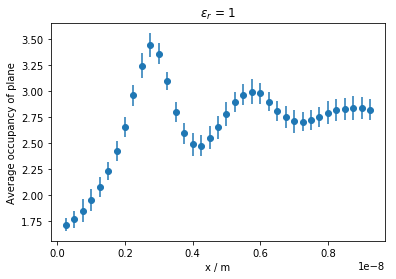

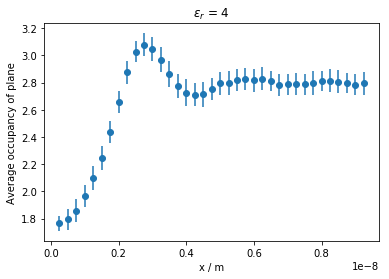

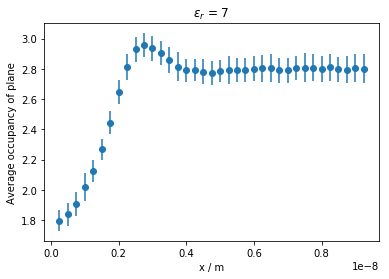

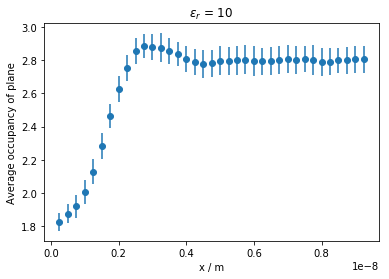

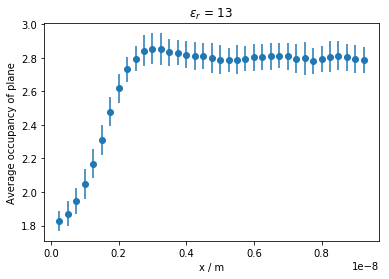

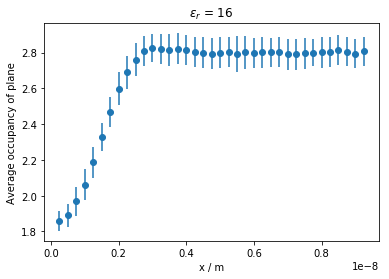

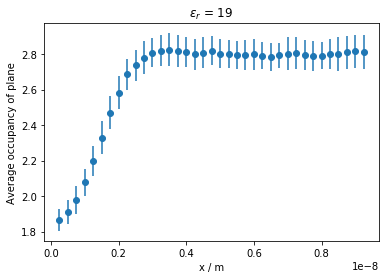

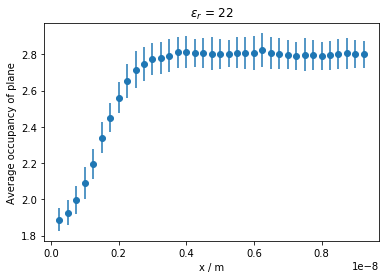

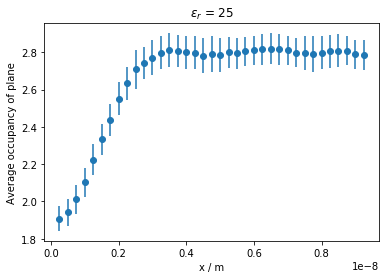

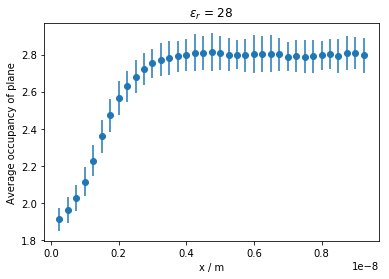

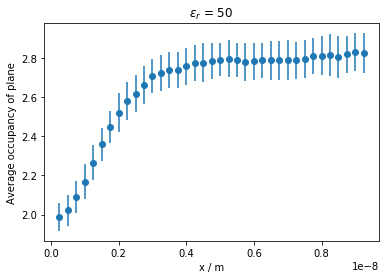

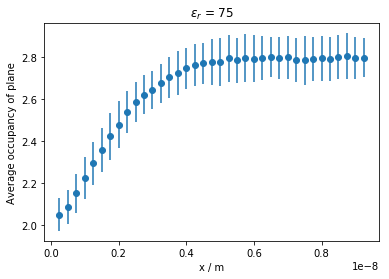

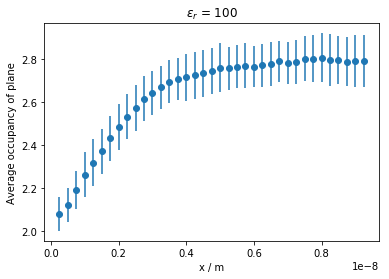

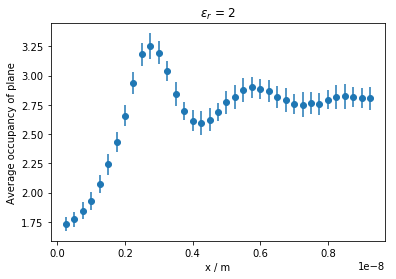

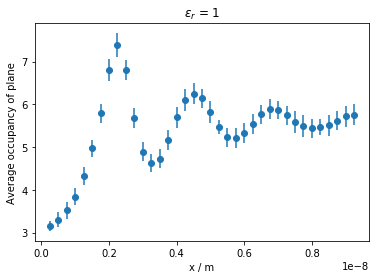

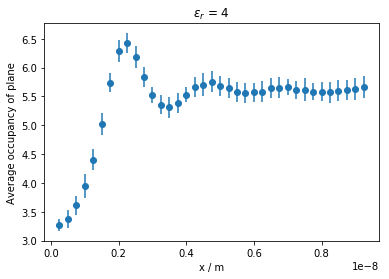

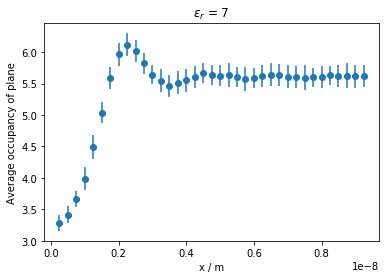

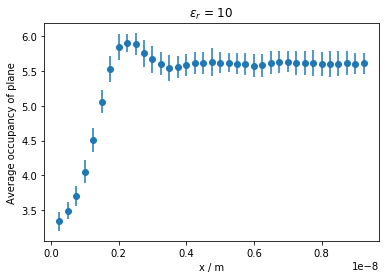

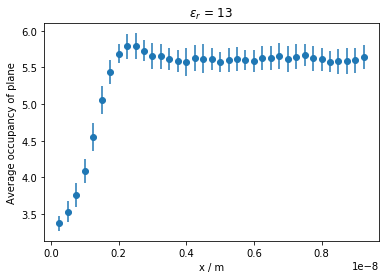

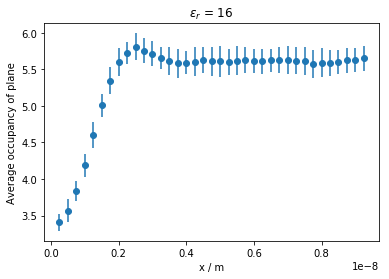

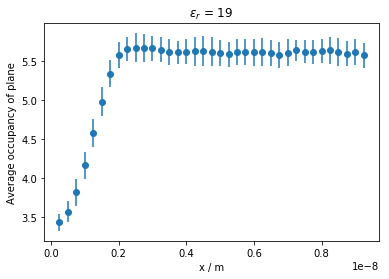

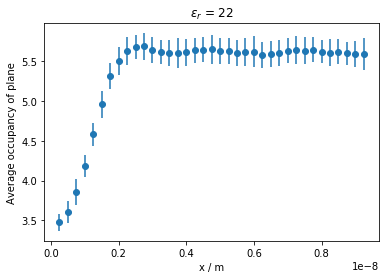

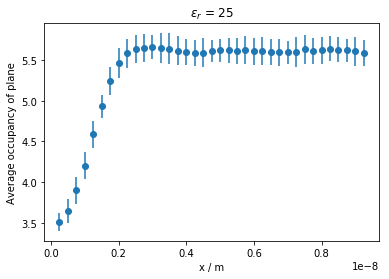

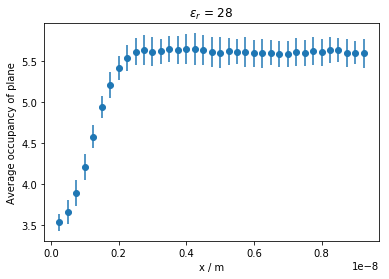

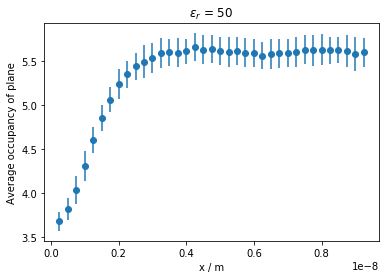

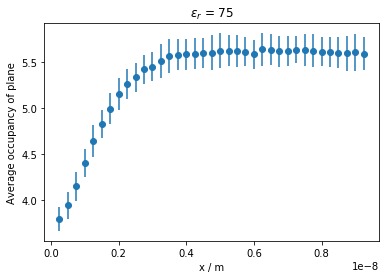

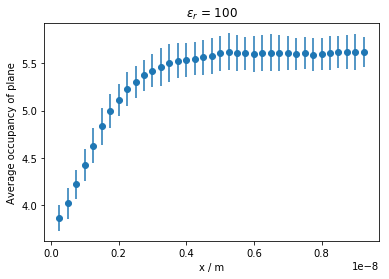

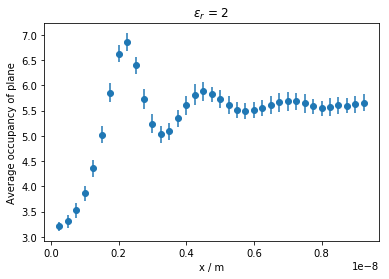

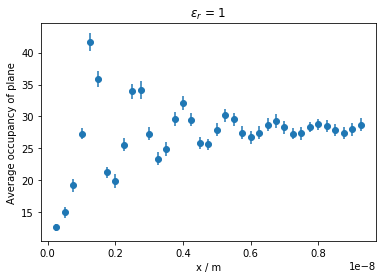

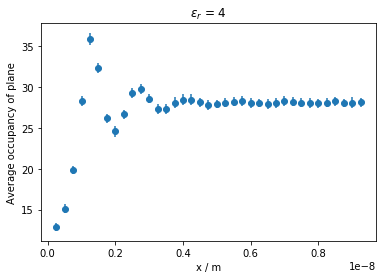

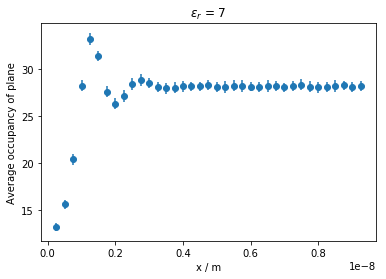

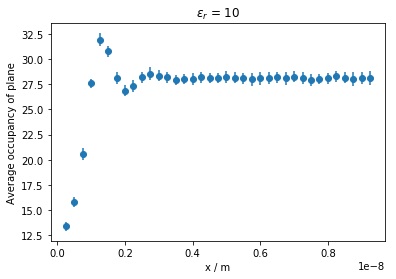

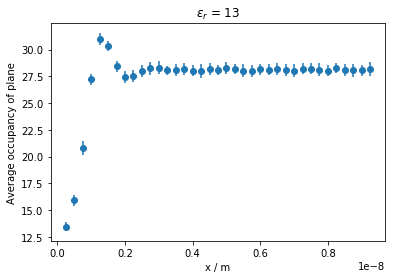

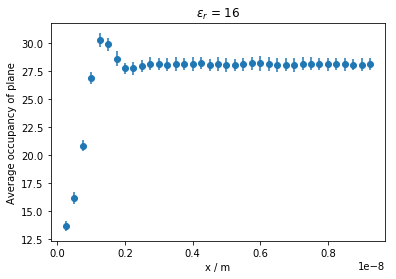

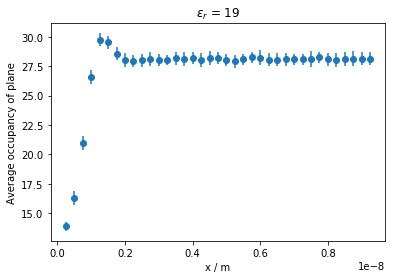

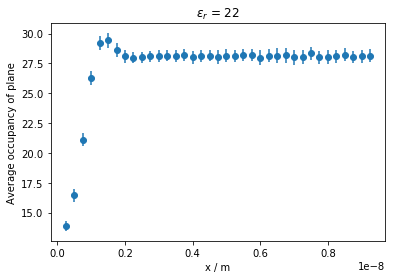

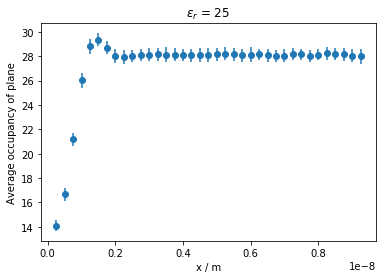

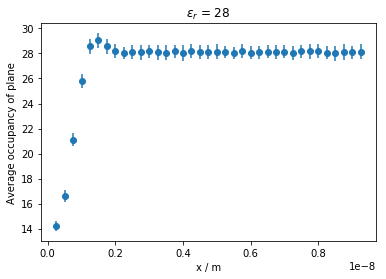

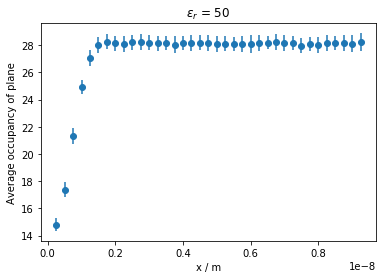

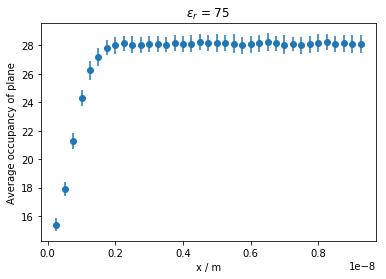

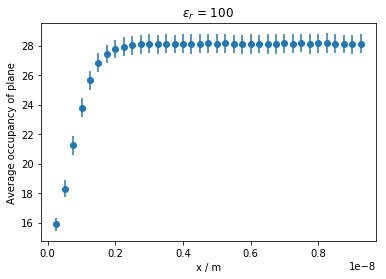

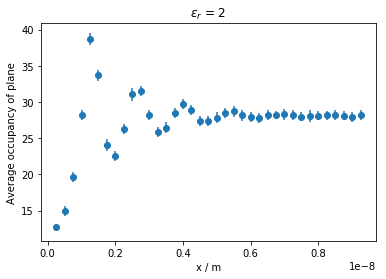

In [8]:
charges_105 = [105]
permittivities_105 = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2, 65, 85]
charges = [ 210, 421, 2109]
permittivities = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 50, 75, 100, 2]

def calculate_averaged_distributions(charges, permittivities):
    
    all_distributions = np.zeros((37,len(permittivities)))

    all_errors_se = np.zeros((37,len(permittivities)))

    all_errors_sd = np.zeros((37,len(permittivities)))
    
    with open("./paths/{}_charges_paths.json".format(charges)) as data:
        paths = json.load(data)
    
    for idx, perm in enumerate(permittivities):

        relevant_paths = paths["permittivity_{}".format(perm)]

        number_of_simulations = len(relevant_paths)

        distributions = np.zeros((37,2 * number_of_simulations))

        for j, path in enumerate(relevant_paths):

            distribution_data = format_distribution(path)

            distributions[:,2 * j] = distribution_data[38:] 
            distributions[:,2 * j + 1] = np.flip(distribution_data[:37])

        distribution = np.mean(distributions, axis = 1 )

        all_distributions[:,idx] = distribution

        err = np.zeros(37)

        for k in range(37):
            err[k] = np.std(distributions[k,:])  


        all_errors_se[:,idx] = err / np.sqrt(2 * number_of_simulations)
        all_errors_sd[:,idx] = err 


        x = np.array(range(1,38))*2.5e-10

        plt.errorbar(x, distribution, err, fmt="o") # error bars are standard deviations
        plt.xlabel(r"x / m")
        plt.ylabel(r"Average occupancy of plane")
        plt.title(r"$\epsilon_{r}$ = " + str(perm))

        # Uncomment the below out if you wish to view all the individual simulations
    #     for i in range(2 * number_of_simulations):
    #         plt.plot(x, distributions[:,i], '-')

        plt.show()
        
    # Create json containing distributions and errors

    data_dictionary = {}

    for i in range(len(permittivities)):
        data_dictionary["distribution_{}".format(permittivities[i])] = list(all_distributions[:,i])
        data_dictionary["standard_deviations_{}".format(permittivities[i])] = list(all_errors_sd[:,i])
        data_dictionary["standard_errors_{}".format(permittivities[i])] = list(all_errors_se[:,i])

    with open('{}_charges_distributions_errors.json'.format(charges), 'w') as outfile:
        json.dump(data_dictionary, outfile)
    
for c in charges:
    calculate_averaged_distributions(c, permittivities)